In [33]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import astropy

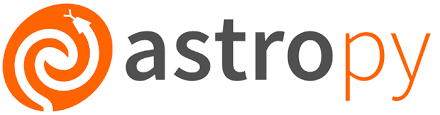

# Unit and Quantaties

In [34]:
from astropy import units as u

In [35]:
distance = 1 * u.lightyear  #1
print(distance) 

1.0 lyr


In [36]:
distance3 = u.Quantity('2 lyr')
print(distance)

1.0 lyr


In [37]:
u.meter

Unit("m")

In [38]:
distance1 = [1,4,6] * u.lightyear
print(distance1)
distance2 = np.array([1,3,5]) * u.lightyear
print(distance2)

[1. 4. 6.] lyr
[1. 3. 5.] lyr


In [39]:
distance1.value

array([1., 4., 6.])

In [40]:
distance2.value

array([1., 3., 5.])

In [41]:
type(distance1)

astropy.units.quantity.Quantity

In [42]:
type(distance2)

astropy.units.quantity.Quantity

In [43]:
np.max(distance1)

<Quantity 6. lyr>

In [44]:
np.mean(distance1)

<Quantity 3.66666667 lyr>

In [45]:
# In CASE of log we are required to give a reference value to make it dimensionless.
np.log((30 * u.MeV) / (10 * u.MeV)) # without 10 MeV it will give an error

<Quantity 1.09861229>

In [46]:
distance1.to('meter') # Unit Conversion

<Quantity [9.46073047e+15, 3.78429219e+16, 5.67643828e+16] m>

In [47]:
distance1.to('parsec')

<Quantity [0.30660139, 1.22640558, 1.83960836] pc>

In [48]:
speed_of_light = distance/ u.year # we have defined the distance in the first line of code.
print(speed_of_light.to('km/s'))

299792.458 km / s


In [49]:
print(speed_of_light.to('angstrom/day'))  # Bhai SAha!!!

2.5902068371199996e+23 Angstrom / d


In [50]:
speed_of_light.si  #SI units

<Quantity 2.99792458e+08 m / s>

In [51]:
speed_of_light.cgs  #CGS units

<Quantity 2.99792458e+10 cm / s>

## Equivalencies

In [52]:
frequency = 3e20 * u.hertz
frequency.to('MeV',equivalencies = u.spectral())  # by using equivalencies = u.spectra() we are able to do so

<Quantity 1.24070031 MeV>

In [53]:
frequency.to('picometer',equivalencies=u.spectral())

<Quantity 0.99930819 pm>

In [54]:
# Temperature
temperature = 25 * u.Celsius
temperature.to('K',equivalencies=u.temperature()) # cool Room Temperature

<Quantity 298.15 K>

In [55]:
with u.imperial.enable():
    print(temperature.to("deg_F",equivalencies=u.temperature())) 

77.0 deg_F


### Constants (Special)

In [56]:
from astropy import constants as const
print(const.c.to('km/hour')) # speed of light

1079252848.8 km / h


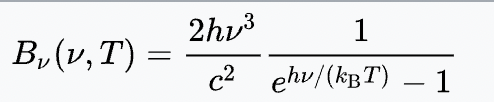

Wikipedia url- https://en.wikipedia.org/wiki/Planck%27s_law

In [57]:
@u.quantity_input(frequency=u.hertz,temperature=u.K)  # defining the units to avoid any error
def Blackbody(frequency,temperature):
    pre_fac = 2 * (const.h * frequency**3)/const.c**2
    expo_fac = 1/(np.exp((const.h* frequency)/(const.k_B * temperature))-1)
    return pre_fac * expo_fac

In [58]:
Blackbody(300*u.hertz,400*u.K)

<Quantity 1.10604915e-32 Hz3 J s3 / m2>

### Interfacing quantaties with third-party code

/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


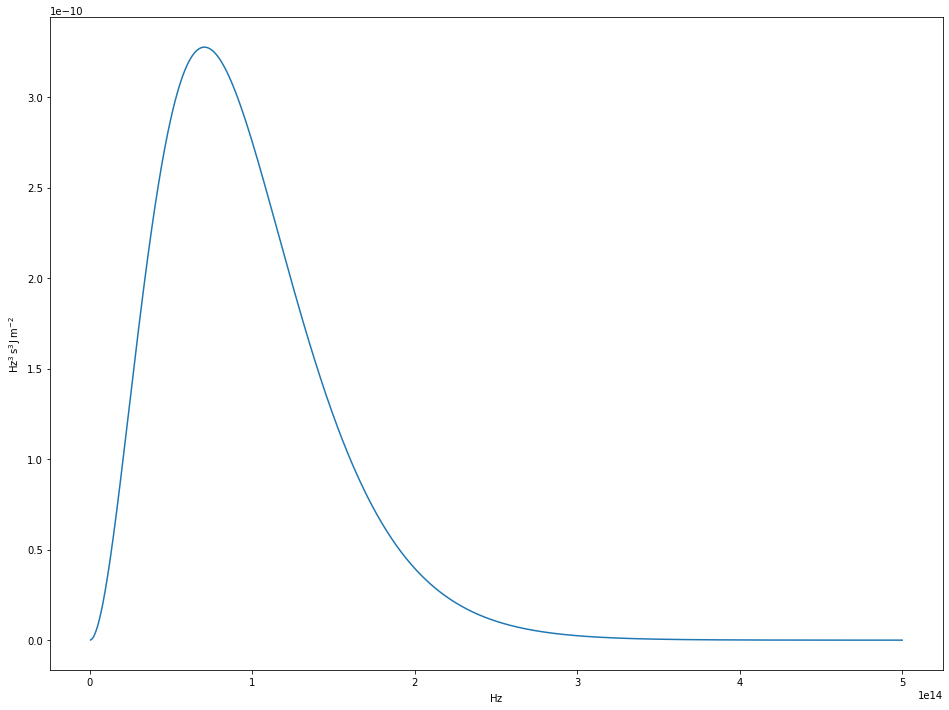

In [59]:
from astropy.visualization import quantity_support 
plt.figure(figsize = (16,12))
temperature = 1200 * u.K
frequencies = np.linspace(1e-5, 0.5e15, 1000) * u.hertz
radiation = Blackbody(frequency = frequencies,temperature = temperature)

with quantity_support():
    plt.plot(frequencies,radiation)

In [60]:
# log functions
emin, emax =[1,10] * u.MeV
energies = np.logspace(np.log10(emin.value),np.log10(emax.value),10) * emin.unit
print(energies)
# The numpy. logspace() function returns number spaces evenly w.r.t interval on a log scale.

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] MeV


In [61]:
energies = np.geomspace(emin,emax,10) #G.P
print(energies)
#geomspace() is used to return numbers spaced evenly on a log scale (a geometric progression).
#This is similar to numpy. logspace() but with endpoints specified directly. Each output sample is a constant multiple of the previous.

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] MeV


### Performance Booster (Cheats)

In [62]:
values = np.ones((500,500,500))  # (500 rows, 500 columns, 500 ones matrice)

In [63]:
%%timeit  #1
quantity = values * u.kpc
# the magic commands %timeit and %%timeit is used to measure the execution time of your code.

586 ms ± 137 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%%timeit #2
quantity = u.Quantity(values,unit ="kpc",copy=False)
# This command takes much less time

6.17 µs ± 58.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
